In [1]:
import numpy as np
import healpy as hp

In [2]:
nside = 128
npix = hp.nside2npix(nside)

In [3]:
vec = hp.ang2vec(np.pi/4, np.pi/4)

In [4]:
ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(10))

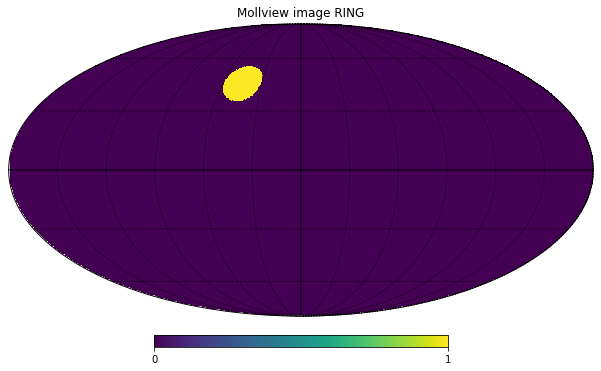

In [13]:
m = np.zeros(npix)
m[ipix_disc] = 1
hp.mollview(m, title="Mollview image RING")
hp.graticule();

In [6]:
kalms = hp.sphtfunc.map2alm(m)

lmax=hp.Alm.getlmax(len(kalms))
ls, ms = hp.Alm.getlm(lmax)
lFactor = -ls*(ls+1)
lFactor[0] = 1

baseAngle = hp.pixelfunc.pix2ang(nside, np.arange(0,npix))

lensedkSZ = np.zeros(npix)
lensedOverdensity = np.zeros(npix)

In [7]:
kalms=hp.sphtfunc.map2alm(m)

In [8]:
lensPotential = -2*kalms/(lFactor)

In [9]:
lensPotential

array([-5.40179917e-02+0.00000000e+00j,  3.28372388e-02-0.00000000e+00j,
        4.92691953e-03-0.00000000e+00j, ...,
        6.66358758e-27-2.24414000e-24j, -3.50380651e-27+6.81624738e-25j,
        9.10690579e-24+8.42586761e-24j])

In [10]:
divLensPot = hp.alm2map_der1(lensPotential,nside)

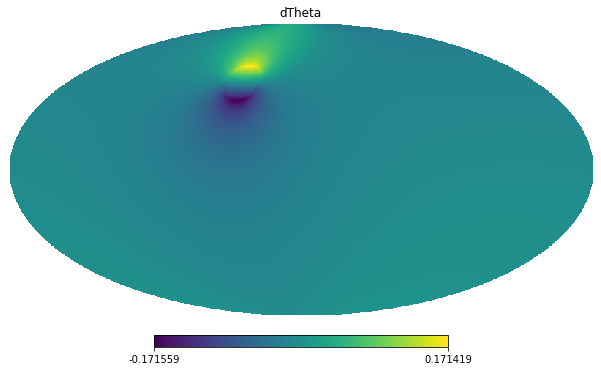

In [11]:
hp.mollview(divLensPot[1,:],title='dTheta');

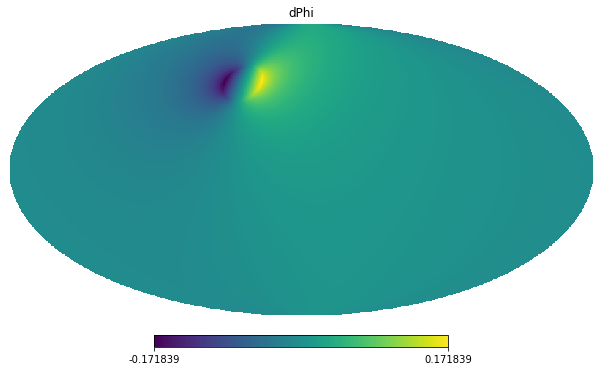

In [12]:
hp.mollview(divLensPot[2,:],title='dPhi');